In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train_nohe.npy', allow_pickle = True)
y_test = np.load('../data/y_test_nohe.npy', allow_pickle = True)

In [14]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_train: ", y_train.shape)
print("shape of Y_test: ", y_test.shape)

shape of X_train:  (122289, 1044)
shape of X_test:  (60232, 1044)
shape of Y_train:  (122289,)
shape of Y_test:  (60232,)


In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
##adaboost classifier for y_train one hot encoded data

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [18]:
y_pred = ada_clf.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.7182824706345192


In [20]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[22175  3967  2609  4391  2444]
 [ 1491 32698   105  1227    65]
 [  380   147 32973  1973   113]
 [ 1702  1295    90 31130  1369]
 [11080  3687  1481 10510  8828]]


In [21]:
print("Classification Report: ", classification_report(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.60      0.62      0.61     35586
           1       0.78      0.92      0.85     35586
           2       0.88      0.93      0.91     35586
           3       0.63      0.87      0.73     35586
           4       0.69      0.25      0.36     35586

    accuracy                           0.72    177930
   macro avg       0.72      0.72      0.69    177930
weighted avg       0.72      0.72      0.69    177930



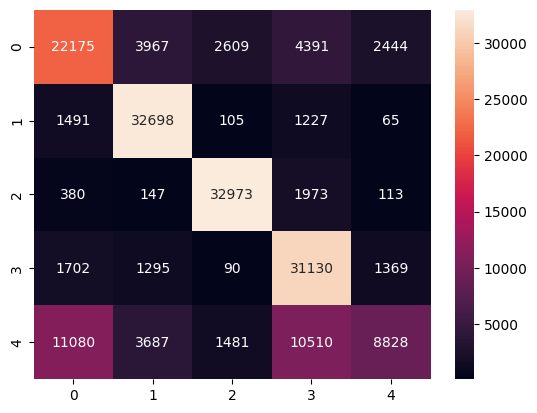

In [23]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()
